<a href="https://colab.research.google.com/github/AysenGC/Projects/blob/main/Capstone_2_Analyzing_the_Netflix_Data_Feature_Engineering_%26_Modeling_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling & EDA

In [196]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [197]:
#Reading the CVS file as pandas dataframe
netflix = pd.read_csv('/content/netflix-rotten-tomatoes-metacritic-imdb.csv')

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
#The dimension of the dataframe(rows,columns)
netflix.shape

(15480, 29)

In [200]:
#The information about the number of entries, columns, types of data and memory usage
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [201]:
#Return first 10 input
netflix.head(10)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...","Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Marcin Dorocinski, Piotr Nowak, Julia Kijowska...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/ima

In [202]:
#Return last 10 input 
netflix.tail(10)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
15470,Jochem Myjer: Yeeehaa!,NaN,"Stand-up Comedy,International Movies,Comedies",NaN,Movie,NaN,Belgium,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70281218,NaN,Join comedian and musician Jochem Myjer for a ...,NaN,http://occ-0-768-769.1.nflxso.net/dnm/api/v6/e...,NaN,NaN,NaN
15471,DreamWorks Short Stories,NaN,"TV Comedies,Kids TV,TV Programmes,TV Cartoons,...",NaN,Series,NaN,"United Kingdom,France,Switzerland,Belgium,Neth...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70259782,NaN,DreamWorkss coolest characters star in this co...,NaN,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15472,DreamWorks Shrek Stories,NaN,"TV Comedies,Kids TV,TV Programmes,Animal Tales...",NaN,Series,NaN,"Belgium,United Kingdom,France,Switzerland,Neth...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70259783,NaN,Shrek celebrates a busy Christmas and a spooky...,NaN,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15473,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,Doesjka van Hoogdalem,Daniël Arends,Daniël Arends,NaN,7.8,NaN,NaN,NaN,NaN,NaN,13 Jan 2012,2015-04-14,NaN,https://www.netflix.com/watch/70281233,NaN,"In his third show, Daniël Arends argues that g...",174.0,http://occ-0-768-769.1.nflxso.net/dnm/api/v6/e...,NaN,NaN,NaN
15474,Nijntje and Vriendjes,NaN,"Kids TV,TV Programmes,Dutch TV Shows,TV Shows ...",NaN,Series,NaN,"Belgium,Netherlands",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70282153,NaN,Dick Brunas classic childrens stories get a ne...,NaN,https://occ-0-768-769.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15479,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.1,"Belgium,Sw

In [203]:
#Finding the number of duplicate rows 
netflix.duplicated().sum()

0

In [204]:
#Check sum of NaN values on each column
nans = netflix.isna().sum()
nans

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

In [205]:
#The number of distinct elements over each axis
netflix.nunique()

Title                    15071
Genre                     1780
Tags                     13378
Languages                 1438
Series or Movie              2
Hidden Gem Score            93
Country Availability      7530
Runtime                      4
Director                  6746
Writer                    9650
Actors                   12934
View Rating                 28
IMDb Score                  83
Rotten Tomatoes Score      101
Metacritic Score            95
Awards Received            130
Awards Nominated For       200
Boxoffice                 3836
Release Date              5314
Netflix Release Date      1823
Production House          3814
Netflix Link             15480
IMDb Link                12847
Summary                  15449
IMDb Votes                7886
Image                    15479
Poster                   11666
TMDb Trailer              7040
Trailer Site                 2
dtype: int64

In [206]:
#Dropping unnessary columns 
netflix = netflix.drop(columns=['Netflix Link', 'IMDb Link', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'])

In [207]:
#As a rule of thumb, if a column has NAN values over %60-70, it should also be dropped. Checking the columns that I am interested in: 
#Set the limit as %70
percent_missing = netflix.isna().sum() * 100 / len(netflix)
percent_missing.round(2)


Title                     0.00
Genre                    11.05
Tags                      0.43
Languages                12.50
Series or Movie           0.00
Hidden Gem Score         13.57
Country Availability      0.12
Runtime                   0.01
Director                 30.41
Writer                   27.97
Actors                   12.44
View Rating              45.37
IMDb Score               13.56
Rotten Tomatoes Score    58.77
Metacritic Score         71.99
Awards Received          60.76
Awards Nominated For     50.51
Boxoffice                74.11
Release Date             13.61
Netflix Release Date      0.00
Production House         66.74
IMDb Votes               13.57
dtype: float64

In [208]:
#According to the calculation and the limit set above, the columns "Metacritic Score" and "Boxoffice" should be eliminated.
netflix = netflix.drop(columns=['Metacritic Score','Boxoffice'])

In [209]:
#The "Release Date" and "Netflix Release Date" columns needs to be formatted.
#The string format should be converted into an appropriate format: YYYY-MM-DD
netflix['Release Date'] = pd.to_datetime(netflix['Release Date']).dt.strftime('%Y-%m-%d')
netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date']).dt.strftime('%Y-%m-%d')

In [210]:
netflix[['Release Date','Netflix Release Date']]

,Release Date,Netflix Release Date
0,2008-12-12,2021-03-04
1,2020-05-08,2021-03-04
2,2020-08-28,2021-03-04
3,2016-10-01,2021-03-04
4,2011-09-22,2021-03-04
...,...,...
15475,NaN,2015-04-14
15476,NaN,2015-04-14
15477,NaN,2015-04-14
15478,NaN,2015-04-14


In [211]:
#Finding unique values in a genre
netflix['Genre'].unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

In [212]:
netflix['Genre'].value_counts()

Comedy                                           1186
Drama                                            1013
Documentary                                       460
Comedy, Drama                                     447
Drama, Romance                                    429
                                                 ... 
Animation, Adventure, Comedy, Fantasy, Sci-Fi       1
Action, Fantasy, Romance                            1
Action, Adventure, Comedy, Horror                   1
Action, Adventure, Comedy, Fantasy, Romance         1
Adventure, Drama, Fantasy, Romance, Thriller        1
Name: Genre, Length: 1780, dtype: int64

In [213]:
netflix['Series or Movie'].value_counts()

Movie     11697
Series     3783
Name: Series or Movie, dtype: int64

In [214]:
netflix['Director'].describe(include = ['category'])

count                10772
unique                6746
top       Steven Spielberg
freq                    28
Name: Director, dtype: object

In [215]:
netflix['Languages'].describe(include = ['category'])

count       13545
unique       1438
top       English
freq         5133
Name: Languages, dtype: object

In [216]:
netflix['Tags'].describe(include = ['category'])

count      15413
unique     13378
top       Dramas
freq          68
Name: Tags, dtype: object

In [217]:
netflix['Runtime'].describe(include = ['category'])

count        15479
unique           4
top       1-2 hour
freq          9121
Name: Runtime, dtype: object

In [218]:
netflix['Production House'].describe(include = ['category'])

count        5149
unique       3814
top       Netflix
freq           82
Name: Production House, dtype: object

In [219]:
#Descriptive statistics of the dataset
netflix.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,300.000000,386.000000,2.354197e+06


In [220]:
# The quantity of Movies vs Series with pie chart
import plotly.express as px
x=netflix["Series or Movie"].value_counts().reset_index()
px.pie(x,values="Series or Movie",names="index")

In [221]:
#Creating two seperate dataframes for Movies and Series makes sense for next steps
#Movie dataframe
netflix_movie = netflix[netflix['Series or Movie']=='Movie']
netflix_movie.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Production House,IMDb Votes
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,1.0,NaN,2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,NaN,NaN,2020-08-28,2021-03-04,NaN,1720.0
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,4.0,2011-09-22,2021-03-04,NaN,63.0
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...","Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya...",NaN,7.4,NaN,NaN,NaN,2020-12-03,2021-03-03,NaN,131.0
8,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Ulf Palme, Ragnar Falck, Hugo Björne, Eva Dahl...",NaN,6.7,NaN,2.0,1.0,1949-10-31,2021-03-03,NaN,88.0


In [222]:
#Series dataframe
netflix_series = netflix[netflix['Series or Movie']=='Series']
netflix_series.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Production House,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",205926.0
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,1.0,NaN,2016-10-01,2021-03-04,NaN,1147.0
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Marcin Dorocinski, Piotr Nowak, Julia Kijowska...",NaN,7.5,NaN,2.0,4.0,2011-06-14,2021-03-03,NaN,47.0
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,NaN,NaN,"Pawel Królikowski, Szymon Bobrowski, Danuta St...",NaN,3.9,NaN,NaN,NaN,2011-03-03,2021-03-03,NaN,107.0
23,Girls und Panzer das Finale,"Animation, Action, Comedy","Drama Anime,Action & Adventure,Action Anime,An...",Japanese,Series,8.5,Japan,< 30 minutes,Tsutomu Mizushima,Reiko Yoshida,"Mami Ozaki, Ikumi Nakagami, Mai Fuchigami, Ai ...",NaN,7.3,NaN,NaN,NaN,2017-12-09,2021-03-02,NaN,210.0


# EDA

In [223]:
#The initial step of the EDA is examining the distribution of data and pointing out the outliers through visualization and mathematical approach.
#Boxplots can communicate a lot of information: min, max, outliers, percentiles, median...Z score describes the Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1.
#The goal of taking Z-scores is to remove the effects of the location and scale of the data, allowing different datasets to be compared directly. 
#The intuition behind the Z-score method of outlier detection is that, once we’ve centred and rescaled the data, anything that is too far from zero (the threshold is usually a Z-score of 3 or -3) should be considered an outlier.
#So, it is important to first re-scale the data through normalization.

In [224]:
#Preparing a dataframe with columns including numerical data of series data. Decided to look at outliers seperately since outlier for a series may not be outlier for Movies.
ratings_series = netflix_series[['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes']]
ratings_series

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,4.3,7.9,98.0,74.0,57.0,205926.0
3,7.7,6.5,NaN,1.0,NaN,1147.0
6,8.7,7.5,NaN,2.0,4.0,47.0
7,6.9,3.9,NaN,NaN,NaN,107.0
23,8.5,7.3,NaN,NaN,NaN,210.0
...,...,...,...,...,...,...
15475,NaN,NaN,NaN,NaN,NaN,NaN
15476,NaN,NaN,NaN,NaN,NaN,NaN
15477,8.4,6.8,NaN,NaN,NaN,71.0
15478,8.2,6.4,NaN,NaN,NaN,82.0


In [225]:
#Preparing a dataframe with columns including numerical data of Movies data.
ratings_movies = netflix_movie[['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes']]
ratings_movies

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
1,7.0,5.8,79.0,1.0,NaN,2838.0
2,6.4,4.3,NaN,NaN,NaN,1720.0
4,8.1,6.3,NaN,NaN,4.0,63.0
5,8.6,7.4,NaN,NaN,NaN,131.0
8,8.3,6.7,NaN,2.0,1.0,88.0
...,...,...,...,...,...,...
15466,8.2,6.2,89.0,1.0,NaN,878.0
15467,8.6,7.3,NaN,NaN,NaN,14.0
15469,NaN,NaN,NaN,NaN,NaN,NaN
15470,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
#Removing the Nan values from each rating(score) column
#Before plotting the boxplot, I need to remove the Nan values from each column.
#Amputation methods like replacing the Nan values with mean, median, or mode would not work here since each movie's or series's rating is significant.
ratings_movies2 = ratings_movies.dropna()
ratings_movies2

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
12,7.8,7.6,92.0,7.0,2.0,2870.0
15,3.5,8.4,68.0,112.0,228.0,951938.0
16,2.8,6.5,52.0,26.0,69.0,733336.0
17,4.4,8.1,96.0,46.0,94.0,766594.0
27,6.7,8.1,89.0,23.0,8.0,5047.0
...,...,...,...,...,...,...
15459,3.0,6.8,63.0,3.0,5.0,11536.0
15460,2.0,4.9,25.0,11.0,22.0,224372.0
15461,1.3,5.3,2.0,1.0,1.0,40841.0
15462,2.4,5.8,37.0,1.0,3.0,10370.0


In [227]:
#Removing Nan values from series df
ratings_series2 = ratings_series.dropna()
ratings_series2

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,4.3,7.9,98.0,74.0,57.0,205926.0
54,3.5,6.6,75.0,1.0,7.0,13379.0
189,3.8,7.2,78.0,1.0,11.0,34427.0
253,7.0,6.6,66.0,1.0,2.0,2649.0
279,8.1,7.1,82.0,12.0,19.0,1435.0
...,...,...,...,...,...,...
14298,4.2,7.5,92.0,20.0,66.0,32352.0
14352,3.4,8.5,63.0,22.0,8.0,26126.0
14656,3.6,7.5,71.0,32.0,107.0,228826.0
14730,4.3,8.1,91.0,23.0,35.0,161359.0


In [228]:
#Normalization is used to transform all variables in the data to the same range. 
#Machine learning algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
#It does not solve the problem caused by outliers, so I will deal with the outliers as a next step.

#Normalization through MinMax Scaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfTest1 = ratings_movies2

cols = dfTest1.columns
dfTest1[cols] = scaler.fit_transform(dfTest1[cols])


dfTest1.head()


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
12,0.808989,0.779221,0.92,0.020067,0.002825,0.001199
15,0.325843,0.883117,0.68,0.371237,0.641243,0.404346
16,0.247191,0.636364,0.52,0.083612,0.192090,0.311488
17,0.426966,0.844156,0.96,0.150502,0.262712,0.325615
27,0.685393,0.844156,0.89,0.073579,0.019774,0.002124


In [229]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfTest2 = ratings_series2

cols = dfTest2.columns
dfTest2[cols] = scaler.fit_transform(dfTest2[cols])

dfTest2.head()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,0.320513,0.644444,0.977011,0.483444,0.236287,0.139970
54,0.217949,0.355556,0.712644,0.000000,0.025316,0.008966
189,0.256410,0.488889,0.747126,0.000000,0.042194,0.023287
253,0.666667,0.355556,0.609195,0.000000,0.004219,0.001666
279,0.807692,0.466667,0.793103,0.072848,0.075949,0.000840


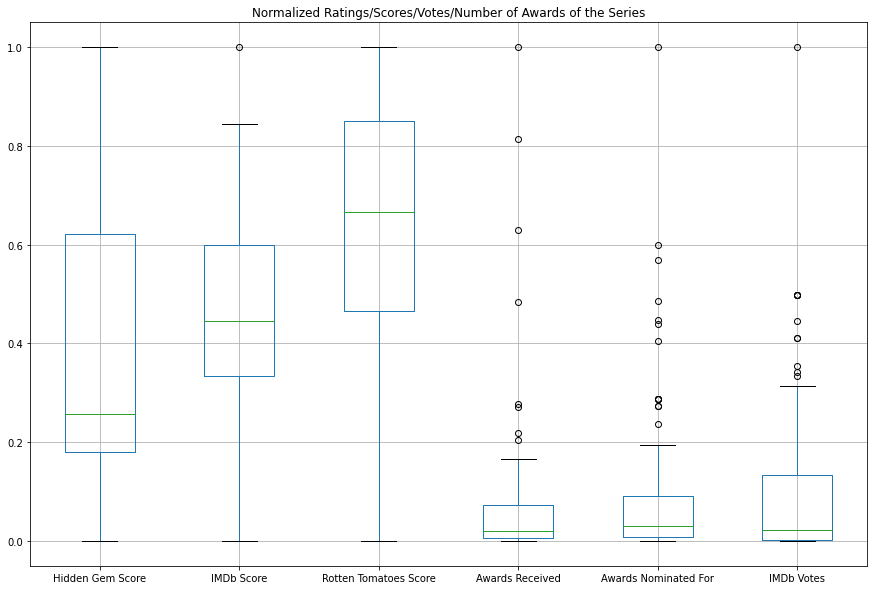

In [230]:
#Finding outliers: There are several methods for finding outliers. I will use boxplotting. 
#Using group boxplots for each dataframe makes more sense due to different scales of ratings/votes/awards.
#Boxplot Series
boxplot = ratings_series2.boxplot(column=['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes'],figsize=(15,10))
boxplot.plot()
plt.title('Normalized Ratings/Scores/Votes/Number of Awards of the Series')

plt.show()

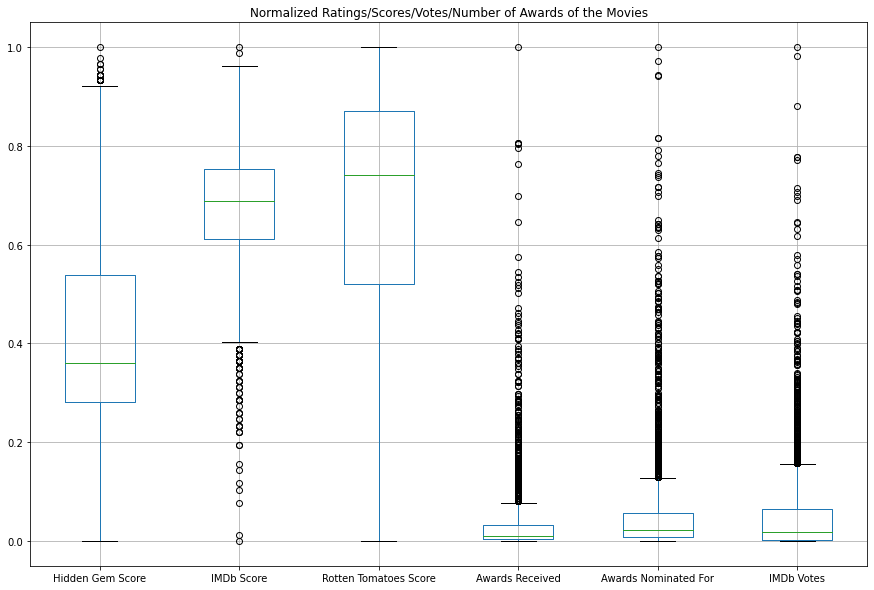

In [231]:
#Boxplot Movies
boxplot = ratings_movies2.boxplot(column=['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes'],figsize=(15,10))
boxplot.plot()
plt.title('Normalized Ratings/Scores/Votes/Number of Awards of the Movies')
plt.show()

In [232]:
#The presence of outliers in votes/awards/ratings actually makes sense. 
#Good movies and series are way different than the mean scores, that is what makes them "good".

In [233]:
#ML algorithms that would perform in the presence of outliers will be considered in the modeling section. 

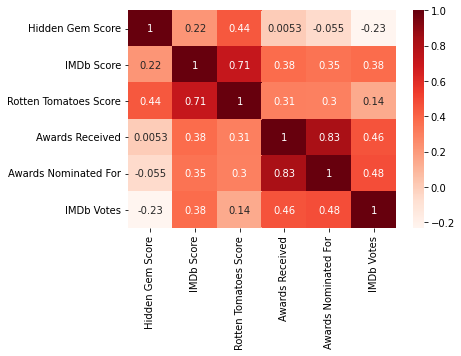

In [234]:
#Heatmap of all the values for TV Series & The Interpretation

sns.heatmap(ratings_movies2[['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes']].corr(), annot=True, cmap = 'Reds')
plt.show()

#In TV Series,
#Hidden Gem Score and Rotten Tomatoes Score are positively correlated. 
#IMDb Score is strongly correlated with Rotten Tomatoes Score.
#It is highly likely that a TV Series formerly nominated for award gets the award.
#The series that were nominated and received award gets high IMDb score and IMDb votes.
#Awards and nominations are not correlated with Hidden Gem Score.



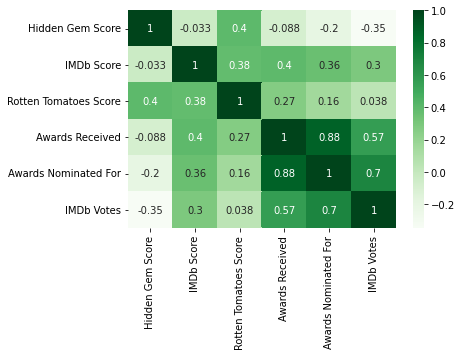

In [235]:
#Heatmap of all the values for Movies
sns.heatmap(ratings_series2[['Hidden Gem Score','IMDb Score','Rotten Tomatoes Score','Awards Received','Awards Nominated For','IMDb Votes']].corr(), annot=True, cmap = 'Greens')
plt.show()

#In Movies, the Hidden Gem Score is positively correlated with Rotten Tomatoes Score.
#It is highly likely that a movie formerly nominated for award gets the award.
#Nominated and rewarded movies gets high IMDb votes & Score.
#Awards and nominations are not correlated with Hidden Gem Score and they are weakly positively correlated with Rotten Tomatoes Score. 


In [236]:
#Concatanating the two dataframes(series and movies) with normalized values
netflix_numeric = pd.concat([dfTest1, dfTest2], ignore_index=True)
netflix_numeric

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,0.808989,0.779221,0.920000,0.020067,0.002825,0.001199
1,0.325843,0.883117,0.680000,0.371237,0.641243,0.404346
2,0.247191,0.636364,0.520000,0.083612,0.192090,0.311488
3,0.426966,0.844156,0.960000,0.150502,0.262712,0.325615
4,0.685393,0.844156,0.890000,0.073579,0.019774,0.002124
...,...,...,...,...,...,...
3615,0.307692,0.555556,0.908046,0.125828,0.274262,0.021875
3616,0.205128,0.777778,0.574713,0.139073,0.029536,0.017639
3617,0.230769,0.555556,0.666667,0.205298,0.447257,0.155551
3618,0.320513,0.688889,0.896552,0.145695,0.143460,0.109648


In [237]:
#Now, I need to merge this numeric values dataframe with the original netflix dataframe including the necessary columns 
#for my analysis
concatenated_netflix = pd.concat([netflix[['Genre','Tags','Series or Movie','Runtime']], netflix_numeric], axis=1)
concatenated_netflix.head(20)

,Genre,Tags,Series or Movie,Runtime,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Series,< 30 minutes,0.808989,0.779221,0.92,0.020067,0.002825,0.001199
1,Comedy,"Dramas,Comedies,Films Based on Books,British",Movie,1-2 hour,0.325843,0.883117,0.68,0.371237,0.641243,0.404346
2,"Drama, Thriller",Thrillers,Movie,1-2 hour,0.247191,0.636364,0.52,0.083612,0.192090,0.311488
3,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Series,< 30 minutes,0.426966,0.844156,0.96,0.150502,0.262712,0.325615
4,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",Movie,1-2 hour,0.685393,0.844156,0.89,0.073579,0.019774,0.002124
5,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Movie,> 2 hrs,0.359551,0.701299,0.85,0.000000,0.000000,0.007056
6,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Series,< 30 minutes,0.887640,0.727273,0.86,0.030100,0.008475,0.000389
7,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Series,< 30 minutes,0.853933,0.753247,0.86,0.026756,0.036723,0.000646
8,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Movie,1-2 hour,0.842697,0.714286,0.79,0.013378,0.005650,0.000534
9,Comedy,"Sports Movies,Sports Comedies,Comedies,Swedish...",Movie,1-2 hour,0.651685,0.766234,0.83,0.003344,0.028249,0.002129


In [238]:
concatenated_netflix_series = concatenated_netflix[concatenated_netflix['Series or Movie']=='Series']
concatenated_netflix_series

,Genre,Tags,Series or Movie,Runtime,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Series,< 30 minutes,0.808989,0.779221,0.92,0.020067,0.002825,0.001199
3,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Series,< 30 minutes,0.426966,0.844156,0.96,0.150502,0.262712,0.325615
6,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Series,< 30 minutes,0.887640,0.727273,0.86,0.030100,0.008475,0.000389
7,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Series,< 30 minutes,0.853933,0.753247,0.86,0.026756,0.036723,0.000646
23,"Animation, Action, Comedy","Drama Anime,Action & Adventure,Action Anime,An...",Series,< 30 minutes,0.213483,0.584416,0.40,0.003344,0.000000,0.020728
...,...,...,...,...,...,...,...,...,...,...
15475,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",Series,< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN
15476,NaN,"Animal Tales,Family Comedies,Family Adventures...",Series,< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN
15477,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",Series,< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN
15478,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",Series,< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
#Investigation of the Runtime of Series
pd.unique(concatenated_netflix_series['Runtime'])

array(['< 30 minutes', nan], dtype=object)

In [240]:
#The most frequent genres in Series
genre_series = (concatenated_netflix_series.Genre.str.split(',')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_series.head(20)


 Drama         869
Animation      869
Comedy         593
Drama          531
 Comedy        517
 Romance       516
 Fantasy       514
 Thriller      412
 Adventure     377
 Family        365
 Action        353
 Sci-Fi        348
 Mystery       335
Documentary    310
 Crime         220
Crime          216
Action         209
 Horror        163
 History       118
Reality-TV     110
Name: Genre, dtype: int64

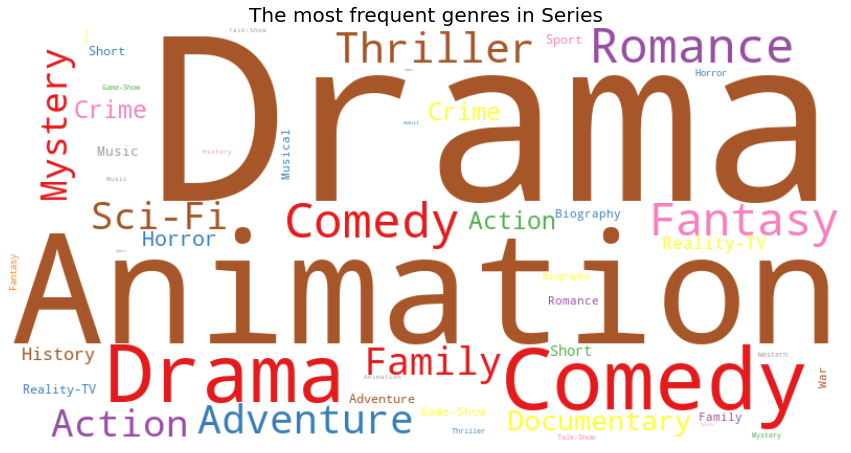

In [241]:
from wordcloud import WordCloud

genre_series_wc = WordCloud(width=800,height=400,background_color='white', colormap='Set1',max_words=50,random_state=42,max_font_size=250)
genre_series_wc.generate_from_frequencies(genre_series.to_dict())
plt.figure(figsize=(15, 10))
plt.imshow(genre_series_wc, interpolation="bilinear")
plt.title('The most frequent genres in Series', fontsize=20)
plt.axis('off')
plt.show()


In [242]:
#The most frequent tags in Series
tags_series = (concatenated_netflix_series.Tags.str.split(',')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
tags_series.head(20)

TV Dramas                  1186
TV Programmes              1145
TV Comedies                 751
Anime Series                549
Kids TV                     511
TV Shows                    483
TV Cartoons                 428
US TV Shows                 367
TV Thrillers                357
Romantic TV Dramas          356
Anime                       328
Crime TV Dramas             327
Reality TV                  255
Korean TV Shows             247
TV Shows Based on Books     245
Docuseries                  243
Japanese TV Shows           242
Documentaries               220
Drama Programmes            211
US TV Programmes            209
Name: Tags, dtype: int64

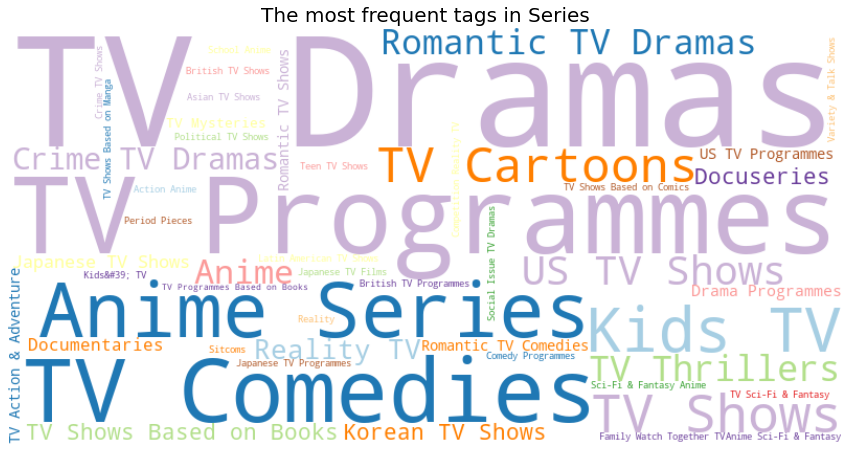

In [243]:
#Tags of Series
tags_series_wc = WordCloud(width=800,height=400,background_color='white',colormap='Paired',max_words=50,random_state=42,max_font_size=250)
tags_series_wc.generate_from_frequencies(tags_series.to_dict())
plt.figure(figsize=(15, 10))
plt.imshow(tags_series_wc, interpolation="bilinear")
plt.title('The most frequent tags in Series', fontsize=20)
plt.axis('off')
plt.show()

In [244]:
concatenated_netflix_movies = concatenated_netflix[concatenated_netflix['Series or Movie']=='Movie']
concatenated_netflix_movies

,Genre,Tags,Series or Movie,Runtime,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
1,Comedy,"Dramas,Comedies,Films Based on Books,British",Movie,1-2 hour,0.325843,0.883117,0.68,0.371237,0.641243,0.404346
2,"Drama, Thriller",Thrillers,Movie,1-2 hour,0.247191,0.636364,0.52,0.083612,0.192090,0.311488
4,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",Movie,1-2 hour,0.685393,0.844156,0.89,0.073579,0.019774,0.002124
5,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Movie,> 2 hrs,0.359551,0.701299,0.85,0.000000,0.000000,0.007056
8,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Movie,1-2 hour,0.842697,0.714286,0.79,0.013378,0.005650,0.000534
...,...,...,...,...,...,...,...,...,...,...
15466,Documentary,"Social & Cultural Documentaries,Biographical D...",Movie,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN
15467,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",Movie,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN
15469,NaN,"Kids Music,Animal Tales,Brazilian Films,Films ...",Movie,< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN
15470,NaN,"Stand-up Comedy,International Movies,Comedies",Movie,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#Investigation of the Runtime of the Movies
pd.unique(concatenated_netflix_movies['Runtime'])

array(['1-2 hour', '> 2 hrs', '< 30 minutes', '30-60 mins'], dtype=object)

In [246]:
#The most frequent genres in Movies
genre_movies = (concatenated_netflix_movies.Genre.str.split(',')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_movies.head(30)

 Drama         2923
Comedy         2814
 Thriller      2222
Drama          2036
Action         1973
 Romance       1822
 Comedy        1153
 Fantasy       1015
 Adventure     1003
 Crime          996
 Family         951
 Sci-Fi         835
 Mystery        787
Animation       780
Documentary     718
 Horror         533
Crime           500
Biography       400
 History        397
Adventure       361
Horror          351
 Music          321
 Sport          290
 War            279
 Action         275
 Biography      180
 Musical        167
Short           151
 Short          124
Thriller         92
Name: Genre, dtype: int64

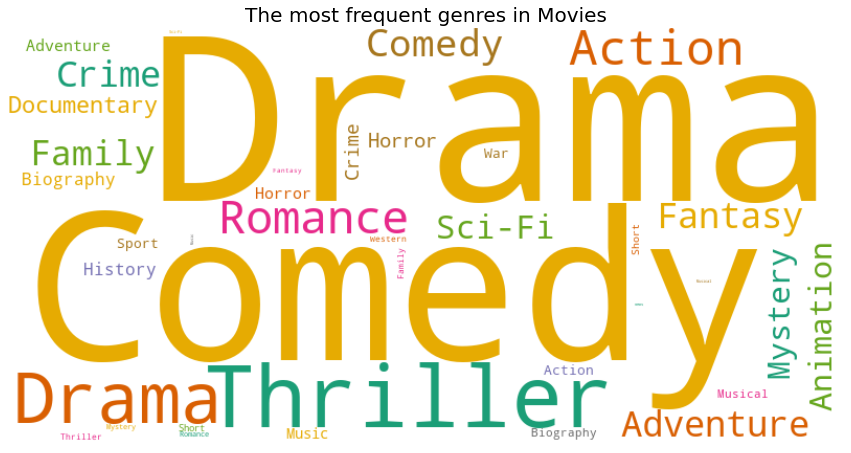

In [247]:
#The most frequent genres in Movies
genre_movies_wc = WordCloud(width=800,height=400,background_color='white',colormap='Dark2',max_words=50,random_state=42,max_font_size=250)
genre_movies_wc.generate_from_frequencies(genre_movies.to_dict())
plt.figure(figsize=(15, 10))
plt.imshow(genre_movies_wc, interpolation="bilinear")
plt.title('The most frequent genres in Movies', fontsize=20)
plt.axis('off')
plt.show()

In [248]:
#The most frequent tags in Movies
tags_movies = (concatenated_netflix_movies.Tags.str.split(',')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
tags_movies.head(30)

Dramas                      4538
Comedies                    4150
Action & Adventure          2080
International Movies        1193
US Movies                   1158
International Dramas        1120
Thrillers                   1042
Romantic Movies             1030
Romantic Dramas             1024
Sci-Fi & Fantasy            1018
Romantic Comedies           1010
Movies Based on Books        968
Romantic Films               883
Crime Movies                 821
Crime Dramas                 792
Crime Action & Adventure     782
Action Thrillers             775
Documentaries                763
International Comedies       712
Japanese Movies              712
Children & Family Movies     681
Dark Comedies                624
Children & Family Films      613
Crime Thrillers              605
Social Issue Dramas          578
Action Sci-Fi & Fantasy      561
Family Features              552
Crime Films                  551
Independent Movies           542
Family Comedies              542
Name: Tags

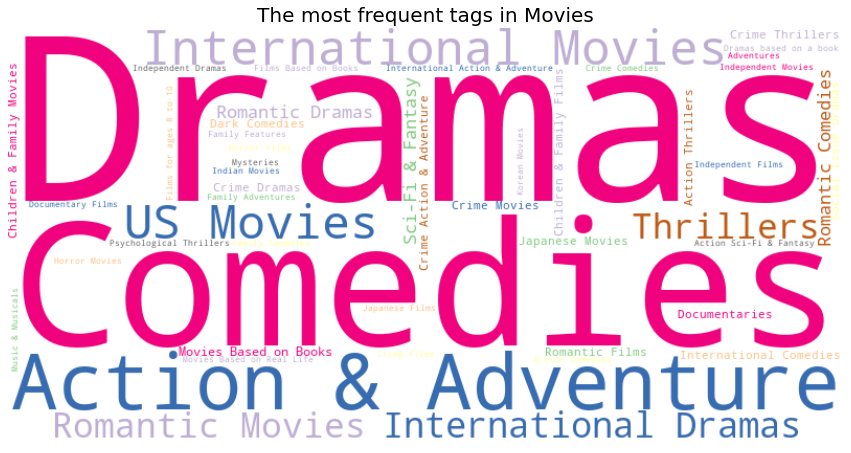

In [249]:
#The most frequent tags in Movies

tags_movies_wc = WordCloud(width=800,height=400,background_color='white',colormap='Accent',max_words=50,random_state=42,max_font_size=250)
tags_movies_wc.generate_from_frequencies(tags_movies.to_dict())
plt.figure(figsize=(15, 10))
plt.imshow(tags_movies_wc, interpolation="bilinear")
plt.title('The most frequent tags in Movies', fontsize=20)
plt.axis('off')
plt.show()

# Pre-processing & Feature Engineering

In [58]:
netflix_series=netflix_series[['Tags','Genre','IMDb Score']]
netflix_series

,Tags,Genre,IMDb Score
0,"Comedy Programmes,Romantic TV Comedies,Horror ...","Crime, Drama, Fantasy, Horror, Romance",7.9
3,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Drama,6.5
6,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Drama,7.5
7,"TV Dramas,Crime TV Dramas,Polish TV Shows",Crime,3.9
23,"Drama Anime,Action & Adventure,Action Anime,An...","Animation, Action, Comedy",7.3
...,...,...,...
15475,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,NaN
15476,"Animal Tales,Family Comedies,Family Adventures...",NaN,NaN
15477,"TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...","Animation, Comedy, Family",6.8
15478,"TV Comedies,Kids TV,TV Cartoons,TV Programmes,...","Animation, Comedy, Family",6.4


In [59]:
netflix_series=netflix_series.dropna(axis=0)
netflix_series

,Tags,Genre,IMDb Score
0,"Comedy Programmes,Romantic TV Comedies,Horror ...","Crime, Drama, Fantasy, Horror, Romance",7.9
3,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Drama,6.5
6,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Drama,7.5
7,"TV Dramas,Crime TV Dramas,Polish TV Shows",Crime,3.9
23,"Drama Anime,Action & Adventure,Action Anime,An...","Animation, Action, Comedy",7.3
...,...,...,...
15451,"Cult TV Programmes,TV Action & Adventure,US TV...","Action, Adventure, Drama, Sci-Fi",8.4
15454,"Anime,Kids TV,TV Programmes,Anime Series,Japan...","Animation, Action, Adventure, Fantasy, Sport, ...",8.0
15477,"TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...","Animation, Comedy, Family",6.8
15478,"TV Comedies,Kids TV,TV Cartoons,TV Programmes,...","Animation, Comedy, Family",6.4


In [60]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

netflix_series['Tags&Genre'] = netflix_series['Tags'] + '' + netflix_series['Genre']
netflix_series=netflix_series.drop(['Tags','Genre'], axis=1)
netflix_series

,IMDb Score,Tags&Genre
0,7.9,"Comedy Programmes,Romantic TV Comedies,Horror ..."
3,6.5,"TV Dramas,Romantic TV Dramas,Dutch TV ShowsDrama"
6,7.5,"TV Dramas,Polish TV Shows,Social Issue TV Dram..."
7,3.9,"TV Dramas,Crime TV Dramas,Polish TV ShowsCrime"
23,7.3,"Drama Anime,Action & Adventure,Action Anime,An..."
...,...,...
15451,8.4,"Cult TV Programmes,TV Action & Adventure,US TV..."
15454,8.0,"Anime,Kids TV,TV Programmes,Anime Series,Japan..."
15477,6.8,"TV Comedies,Kids TV,Animal Tales,TV Cartoons,T..."
15478,6.4,"TV Comedies,Kids TV,TV Cartoons,TV Programmes,..."


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(s):
   return s.split(',')

tf1 = TfidfVectorizer(tokenizer=tokenizer)
res1 = tf1.fit_transform(netflix_series['Tags&Genre'])
res1

<3084x1327 sparse matrix of type '<class 'numpy.float64'>'
	with 21358 stored elements in Compressed Sparse Row format>

In [62]:
res1.shape

(3084, 1327)

In [63]:
res1.dtype

dtype('float64')

In [64]:
X1=res1
y1=netflix_series['IMDb Score'].values
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.25,random_state=0)

In [66]:
netflix_movie=netflix_movie[['Tags','Genre','IMDb Score']]
netflix_movie

,Tags,Genre,IMDb Score
1,"Dramas,Comedies,Films Based on Books,British",Comedy,5.8
2,Thrillers,"Drama, Thriller",4.3
4,"Social Issue Dramas,Teen Movies,Dramas,Comedie...","Animation, Short, Drama",6.3
5,"Romantic Comedies,Comedies,Romantic Films,Thai...","Comedy, Romance",7.4
8,"Social Issue Dramas,Dramas,Movies Based on Boo...",Drama,6.7
...,...,...,...
15466,"Social & Cultural Documentaries,Biographical D...",Documentary,6.2
15467,"Australian Comedies,Romantic Comedies,Australi...","Documentary, Music",7.3
15469,"Kids Music,Animal Tales,Brazilian Films,Films ...",NaN,NaN
15470,"Stand-up Comedy,International Movies,Comedies",NaN,NaN


In [67]:
netflix_movies=netflix_movie.dropna(axis=0)
netflix_movies

,Tags,Genre,IMDb Score
1,"Dramas,Comedies,Films Based on Books,British",Comedy,5.8
2,Thrillers,"Drama, Thriller",4.3
4,"Social Issue Dramas,Teen Movies,Dramas,Comedie...","Animation, Short, Drama",6.3
5,"Romantic Comedies,Comedies,Romantic Films,Thai...","Comedy, Romance",7.4
8,"Social Issue Dramas,Dramas,Movies Based on Boo...",Drama,6.7
...,...,...,...
15464,"International Movies,Action Thrillers,French F...","Action, Crime, Thriller",6.5
15465,"Romantic Comedies,Comedies,Romantic Films,Roma...","Comedy, Fantasy, Romance",6.2
15466,"Social & Cultural Documentaries,Biographical D...",Documentary,6.2
15467,"Australian Comedies,Romantic Comedies,Australi...","Documentary, Music",7.3


In [68]:
netflix_movies['Tags&Genre'] = netflix_movies['Tags'] + '' + netflix_movies['Genre']
netflix_movies=netflix_movies.drop(['Tags','Genre'], axis=1)
netflix_movies

,IMDb Score,Tags&Genre
1,5.8,"Dramas,Comedies,Films Based on Books,BritishCo..."
2,4.3,"ThrillersDrama, Thriller"
4,6.3,"Social Issue Dramas,Teen Movies,Dramas,Comedie..."
5,7.4,"Romantic Comedies,Comedies,Romantic Films,Thai..."
8,6.7,"Social Issue Dramas,Dramas,Movies Based on Boo..."
...,...,...
15464,6.5,"International Movies,Action Thrillers,French F..."
15465,6.2,"Romantic Comedies,Comedies,Romantic Films,Roma..."
15466,6.2,"Social & Cultural Documentaries,Biographical D..."
15467,7.3,"Australian Comedies,Romantic Comedies,Australi..."


In [69]:
def tokenizer(s):
   return s.split(',')

tf2 = TfidfVectorizer(tokenizer=tokenizer,ngram_range=(1,3), stop_words='english', lowercase=True)
res2 = tf2.fit_transform(netflix_movies['Tags&Genre'])
res2

<10208x66870 sparse matrix of type '<class 'numpy.float64'>'
	with 210641 stored elements in Compressed Sparse Row format>

In [70]:
res2.shape

(10208, 66870)

In [72]:
#1 is for series dataframe
#2 is for movies dataframe
X2=res2
y2=netflix_movies['IMDb Score'].values
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.25,random_state=0)

In [73]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(7656, 66870) (2552, 66870) (7656,) (2552,)


**Linear Models**

Here I will use linear regression and then, logistic regression by converting the problem into a classification problem:

**Linear Regression Model for Series**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr=LinearRegression().fit(X1_train,y1_train)
y1_pred = lr.predict(X1_test)

In [75]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [ 0.19607121  0.5925818   2.2368075  ...  1.15308653 -0.73078813
 -0.12267171]
lr.intercept_: 6.254891170738498


In [76]:
print("Training set score:{:.2f}".format(lr.score(X1_train, y1_train)))
print("Test set score:{:.2f}".format(lr.score(X1_test,y1_test)))

Training set score:0.63
Test set score:-0.26


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
#X1_test = X1_test.toarray()
#y1_test = y1_test.toarray()
print("Mean squared error: %.2f" % mean_squared_error(y1_test,y1_pred))
print("R-square: %.2f" % r2_score(y1_test,y1_pred))

Mean squared error: 1.64
R-square: -0.26


**Linear Regression for Movies**

In [78]:
#Series
X2=res2
y2=netflix_movies['IMDb Score'].values
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.25,random_state=0)

In [79]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(7656, 66870) (2552, 66870) (7656,) (2552,)


In [80]:
lr=LinearRegression().fit(X2_train,y2_train)
y2_pred = lr.predict(X2_test)

In [81]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [-3.10175963  1.05621468  2.22509549 ... -0.56472631 -0.56472631
 -0.56472631]
lr.intercept_: 10.792080760053286


In [82]:
print("Training set score:{:.2f}".format(lr.score(X2_train,y2_train)))
print("Test set score:{:.2f}".format(lr.score(X2_test,y2_test)))

Training set score:0.97
Test set score:-0.29


In [83]:
#X2_test = X2_test.toarray()
#y2_test = y2_test.toarray()
print("Mean squared error: %.2f" % mean_squared_error(y2_test,y2_pred))
print("R-square: %.2f" % r2_score(y2_test,y2_pred))

Mean squared error: 1.54
R-square: -0.29


The linear regression model did not work well, and this was expected.

**Logistic Regression Model**

To be able to use the random forest model, the problem should be converted into a classification problem. 
The genre&tags that received an IMDb score > 7.5 will be labeled as 1.
The genre&tags that listed as the rest <7.5 will be labeled as 0.

**Logistic Regression Model for Series**

In [84]:
netflix_series['1/0'] = netflix_series['IMDb Score'].apply(lambda x: 1 if x > 7.5 else 0)
netflix_series.head(10)

,IMDb Score,Tags&Genre,1/0
0,7.9,"Comedy Programmes,Romantic TV Comedies,Horror ...",1
3,6.5,"TV Dramas,Romantic TV Dramas,Dutch TV ShowsDrama",0
6,7.5,"TV Dramas,Polish TV Shows,Social Issue TV Dram...",0
7,3.9,"TV Dramas,Crime TV Dramas,Polish TV ShowsCrime",0
23,7.3,"Drama Anime,Action & Adventure,Action Anime,An...",0
25,7.0,"Mystery Programmes,Drama Programmes,Crime TV D...",0
26,7.1,"TV Dramas,US TV Shows,TV Shows Based on Books,...",0
45,8.3,"TV Dramas,Political TV Shows,BritishDrama, Sci-Fi",1
46,8.2,"TV Dramas,Italian TV ShowsDrama",1
53,8.0,"TV Comedies,TV Dramas,US TV ShowsDrama",1


In [85]:
X1=res1
y1=netflix_series['1/0'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression().fit(X1_train, y1_train)
pred1=logreg.predict(X1_test)

print("Training set score:{:.2f}".format(logreg.score(X1_train, y1_train)))
print("Test score:{:.2f}".format(logreg.score(X1_test,y1_test)))

Training set score:0.75
Test score:0.65


In [86]:
#Confusion MATRIX
from sklearn.metrics import confusion_matrix

print("\nConfusion matrix of the Logistic Regression:")
print(confusion_matrix(y1_test, pred1))


Confusion matrix of the Logistic Regression:
[[415  71]
 [199  86]]


In [87]:
#Classification report 
from sklearn.metrics import classification_report
print(classification_report(y1_test, pred1))


              precision    recall  f1-score   support

           0       0.68      0.85      0.75       486
           1       0.55      0.30      0.39       285

    accuracy                           0.65       771
   macro avg       0.61      0.58      0.57       771
weighted avg       0.63      0.65      0.62       771



**Logistic Regression Model for Movies**




In [88]:
netflix_movies['1/0'] = netflix_movies['IMDb Score'].apply(lambda x: 1 if x > 7.5 else 0)
netflix_movies.head()

,IMDb Score,Tags&Genre,1/0
1,5.8,"Dramas,Comedies,Films Based on Books,BritishCo...",0
2,4.3,"ThrillersDrama, Thriller",0
4,6.3,"Social Issue Dramas,Teen Movies,Dramas,Comedie...",0
5,7.4,"Romantic Comedies,Comedies,Romantic Films,Thai...",0
8,6.7,"Social Issue Dramas,Dramas,Movies Based on Boo...",0


In [89]:
X2=res2
y2=netflix_movies['1/0'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)
logreg= LogisticRegression().fit(X2_train, y2_train)
pred2=logreg.predict(X2_test)

print("Training set score:{:.2f}".format(logreg.score(X2_train, y2_train)))
print("Test score:{:.2f}".format(logreg.score(X2_test,y2_test)))

Training set score:0.89
Test score:0.88


In [90]:
#Confusion Matrix
print("\nConfusion matrix of the Logistic Regression:")
print(confusion_matrix(y2_test, pred2))


Confusion matrix of the Logistic Regression:
[[2246    0]
 [ 304    2]]


In [91]:
#Classification Report
print(classification_report(y2_test, pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2246
           1       1.00      0.01      0.01       306

    accuracy                           0.88      2552
   macro avg       0.94      0.50      0.47      2552
weighted avg       0.90      0.88      0.83      2552



**Random Forest Model for Series**

In [92]:
X1=res1
y1=netflix_series['1/0'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=100, random_state=42)
forest1.fit(X1_train, y1_train)
y_pred1 = forest1.predict(X1_test)

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on the training set: {:.2f}".format(forest1.score(X1_train, y1_train)))
print("Accuracy on the test set: {:.2f}".format(forest1.score(X1_test,y1_test)))
print("The accuracy score is: {:.2f}".format(accuracy_score(y1_test, y_pred1)))

Accuracy on the training set: 0.99
Accuracy on the test set: 0.66
The accuracy score is: 0.66


In [93]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

forest1.feature_importances_

array([9.02194780e-03, 1.16938426e-02, 1.34359136e-03, ...,
       2.91927128e-04, 6.33652741e-08, 0.00000000e+00])

In [103]:
dict1 = {'feature':tf1.get_feature_names(),
         'score':forest1.feature_importances_}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [131]:
tfidf_df1 = pd.DataFrame(dict1)
sorted1=tfidf_df1.sort_values(by='score', ascending=False).head(20)
sorted1

,feature,score
1180,tv programmes,0.031638
1144,tv dramas,0.026343
7,drama,0.025464
1131,tv comedies,0.018932
18,romance,0.017303
604,kids tv,0.015544
1212,tv shows,0.013867
9,fantasy,0.013377
5,comedy,0.013180
6,crime,0.013009


Text(0.5, 0, 'Random Forest Feature Importance(Series)')

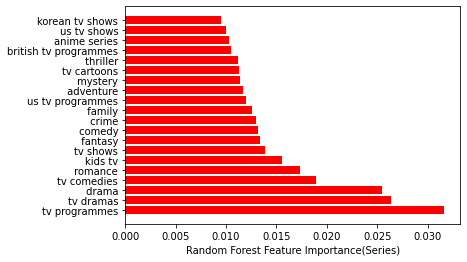

In [141]:
plt.barh(sorted1['feature'],sorted1['score'],color='red')
plt.xlabel('Random Forest Feature Importance(Series)')


In [250]:
#Model Evaluation
print(confusion_matrix(y1_test,y_pred1))
print(classification_report(y1_test,y_pred1))
print(accuracy_score(y1_test, y_pred1))


[[415  71]
 [191  94]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       486
           1       0.57      0.33      0.42       285

    accuracy                           0.66       771
   macro avg       0.63      0.59      0.59       771
weighted avg       0.64      0.66      0.63       771

0.6601815823605707


**Random Forest Model for Movies**

In [133]:
X2=res2
y2=netflix_movies['1/0'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier(n_estimators=100, random_state=42)
forest2.fit(X2_train, y2_train)
y_pred2 = forest2.predict(X2_test)

print("Accuracy on the training set: {:.2f}".format(forest2.score(X2_train, y2_train)))
print("Accuracy on the test set: {:.2f}".format(forest2.score(X2_test,y2_test)))
print("The accuracy score is: {:.2f}".format(accuracy_score(y2_test, y_pred2)))

Accuracy on the training set: 0.99
Accuracy on the test set: 0.88
The accuracy score is: 0.88


In [134]:
#Feature Importance
forest2.feature_importances_

array([3.42986202e-04, 2.38191104e-04, 4.14864484e-05, ...,
       4.57277794e-11, 0.00000000e+00, 4.42289968e-10])

In [136]:
dict2 = {'feature':tf2.get_feature_names(),
         'score':forest2.feature_importances_}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [137]:
tfidf_df2 = pd.DataFrame(dict2)
sorted2=tfidf_df2.sort_values(by='score', ascending=False).head(20)
sorted2

,feature,score
11799,classic films,0.008916
7083,award-winning movies,0.004707
12407,comedies,0.003704
11500,classic action & adventure,0.003480
21560,documentary filmsdocumentary,0.002951
885,academy award-winning films,0.002807
20934,documentaries,0.002794
302,drama,0.002673
60969,stand-up comedy,0.002628
11681,classic dramas,0.002362


Text(0.5, 0, 'Random Forest Feature Importance(Movies)')

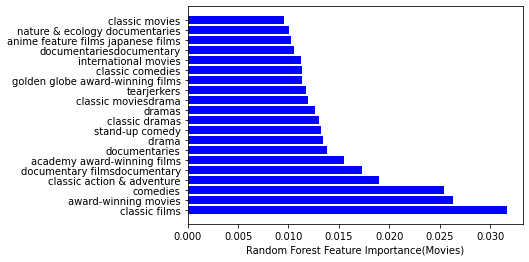

In [140]:
plt.barh(sorted2['feature'],sorted1['score'],color='blue')
plt.xlabel('Random Forest Feature Importance(Movies)')

In [251]:
#Model Evaluation
print(confusion_matrix(y2_test,y_pred2))
print(classification_report(y2_test,y_pred2))
print(accuracy_score(y2_test, y_pred2))


[[2229   17]
 [ 282   24]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2246
           1       0.59      0.08      0.14       306

    accuracy                           0.88      2552
   macro avg       0.74      0.54      0.54      2552
weighted avg       0.85      0.88      0.84      2552

0.8828369905956113
